## Final Project Submission

Please fill out:
* Student name: John Cho
* Student pace: full time online
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL: https://medium.com/@johnnyboyee/inaugural-post-my-foray-into-data-science-800d2876f6c5


### The approach to this project will be to isolate and analyze the most successful movies, starting with metrics of revenue and profitability. Other factors such as genres, ratings, popularity and production staff will be examined for correlations and final recommendations will be made based on these findings.

# Importing Libraries, Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

gross = pd.read_csv('zippedData/bom.movie_gross.csv')
names = pd.read_csv('zippedData/name.basics.csv')
titles = pd.read_csv('zippedData/title.akas.csv')
titles2 = pd.read_csv('zippedData/title.basics.csv')
crews = pd.read_csv('zippedData/title.crew.csv')
principals = pd.read_csv('zippedData/title.principals.csv')
ratings = pd.read_csv('zippedData/title.ratings.csv')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv')
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [2]:
#Preview data
display(gross.head(2), gross.shape, names.head(2), names.shape, titles.head(2), titles.shape, titles2.head(2), titles2.shape,
        crews.head(2), crews.shape, principals.head(2), principals.shape, ratings.head(2), ratings.shape, tmdb.head(2),
        tmdb.shape, budgets.head(2), budgets.shape)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


(3387, 5)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


(606648, 6)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


(331703, 8)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


(146144, 6)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


(146144, 3)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


(1028186, 6)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


(73856, 3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


(26517, 10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


(5782, 6)

### We'll start with the 'gross' table to determine the top studios by revenue

In [3]:
#Preview info, null values, duplicates
display(gross.info(), gross.isna().sum(), f'Duplicates: {gross.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

'Duplicates: 0'

# Start cleaning data

In [4]:
#Drop 'year' column, convert null values to zero
df = gross.drop('year', axis=1)

df.domestic_gross = df.domestic_gross.fillna(0)
df.foreign_gross = df.foreign_gross.str.replace(',','')
df.foreign_gross = df.foreign_gross.fillna(0)
df.foreign_gross = df.foreign_gross.astype('float64') #why does this command throw an error if 'int64'??

display(df.info(), df.isna().sum(), df[df.studio.isna()==True]) #show entire row contents with null 'studio' values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null float64
dtypes: float64(2), object(2)
memory usage: 106.0+ KB


None

title             0
studio            5
domestic_gross    0
foreign_gross     0
dtype: int64

,title,studio,domestic_gross,foreign_gross
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0
555,Fireflies in the Garden,NaN,70600.0,3300000.0
933,Keith Lemon: The Film,NaN,0.0,4000000.0
1862,Plot for Peace,NaN,7100.0,0.0
2825,Secret Superstar,NaN,0.0,122000000.0


#### Should be to okay leave these 5 alone.. now let's get total revenues by studio

In [5]:
#df.dropna(axis=0, subset=['studio'], inplace=True)

#Create 'total_gross' column and sort
df['total_gross'] = 0.00
df.total_gross = (df.domestic_gross + df.foreign_gross).astype('int64')
df = df.sort_values(by='total_gross', ascending=False)
df.domestic_gross = df.domestic_gross.astype('int64')
df.foreign_gross = df.foreign_gross.astype('int64')

#Get some stats
pd.set_option('display.precision',12)
display(df.head(), df.describe().round(), 'Medians:', df.median())

,title,studio,domestic_gross,foreign_gross,total_gross
727,Marvel's The Avengers,BV,623400000,895500000,1518900000
1875,Avengers: Age of Ultron,BV,459000000,946400000,1405400000
3080,Black Panther,BV,700100000,646900000,1347000000
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000,960500000,1341500000
2758,Star Wars: The Last Jedi,BV,620200000,712400000,1332600000


,domestic_gross,foreign_gross,total_gross
count,3387.0,3387.0,3387.0
mean,28508206.0,45029795.0,73538001.0
std,66755749.0,112684346.0,170509102.0
min,0.0,0.0,100.0
25%,111500.0,0.0,274000.0
50%,1300000.0,1500000.0,5475000.0
75%,27500000.0,29150000.0,61350000.0
max,936700000.0,960500000.0,1518900000.0


'Medians:'

domestic_gross    1300000.0
foreign_gross     1500000.0
total_gross       5475000.0
dtype: float64

#### The 0 values could indicate missing data but we cannot assume that since some movies might be domestic / foreign only.. so we will not attempt to fill in missing data.The high max (1.5B), large standard deviation (170M), huge leaps in each quarter percentile, and big difference between the mean (73.5M) and median (5.5M) tells us that this data set is not normal and EXTREMELY top heavy.

# Visualize the top 10 studios by combined revenue

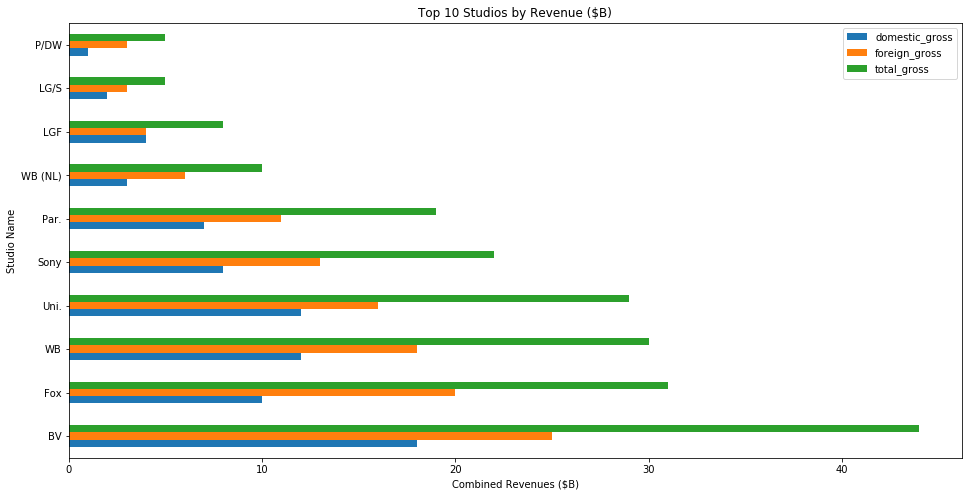

In [6]:
#In the markdown cell above how to add the '$' in front of the figures in '()' without it auto changing size/font??

#Determine sum totals for each studio, take top 10 to plot
dfs = df.groupby(['studio']).sum().sort_values(by='total_gross', ascending=False)

#Below trying to convert numbers to billions - all values go to 0 - why??
#for x in dfs:
#    dfs.total_gross = (dfs.total_gross / 1000000000).astype('float64')
#    dfs.domestic_gross = (dfs.domestic_gross / 1000000000).round(0).astype('int64')
#    dfs.foreign_gross = (dfs.foreign_gross / 1000000000).astype('int64').round(0)
#this below works
dfs = dfs.iloc[:10]/1000000000//1

dfs.plot(kind='barh', figsize=(16,8), title='Top 10 Studios by Revenue ($B)')
plt.xlabel('Combined Revenues ($B)')
plt.ylabel('Studio Name')
plt.show()

### Higher revenues don't necessarily mean higher profits, so let's look at the top 10 studios by combined profit

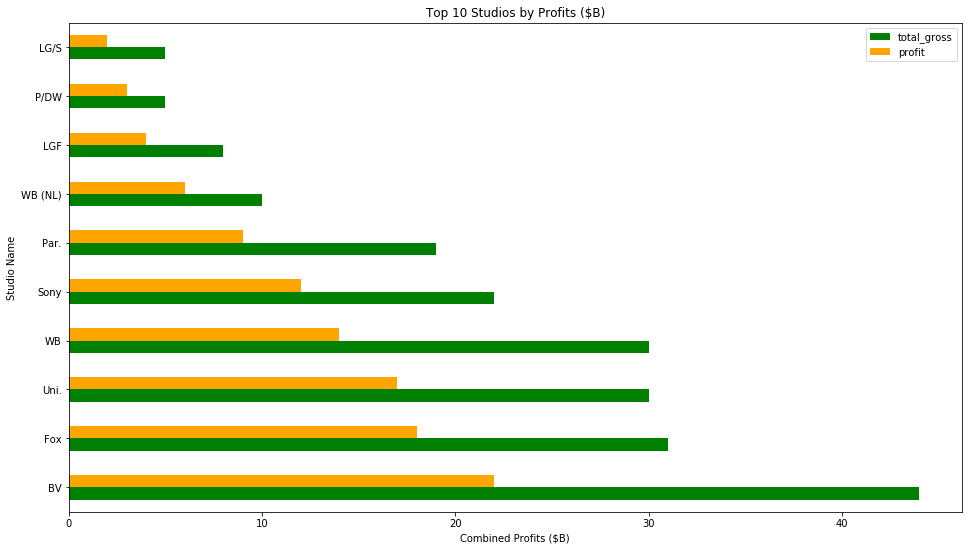

In [7]:
#Bring over 'production_budget' column from 'budgets' table
dfp = budgets.set_index('movie')
dfp = df.set_index('title').join(dfp.production_budget)

#Clean up 'production_budget' column and create 'profit' column
dfp.production_budget = dfp.production_budget.str.replace(',','')
dfp.production_budget = dfp.production_budget.str.replace('$','')
dfp.production_budget = dfp.production_budget.astype('float64')
dfp['profit'] = (dfp.total_gross - dfp.production_budget).round(2)

#Find subtotals for each column by studio and plot the top 10 (by total profit)
dfs = dfp.groupby(['studio']).sum().sort_values(by='profit', ascending=False)
df1 = dfs.iloc[:10]/1000000000//1
df1.drop(['domestic_gross', 'foreign_gross', 'production_budget'], axis=1, inplace=True)

df1.plot(kind='barh', figsize=(16,9), color=['green','orange'], title='Top 10 Studios by Profits ($B)')
plt.xlabel('Combined Profits ($B)')
plt.ylabel('Studio Name')
plt.style.use('ggplot')
plt.show()

### Confirmed the top 10 studios by combined profit and revenues are the same (slightly different order). Let's also note that this may be a reflection of the available public data (studios are more likely to release financial figures if they are favorable).

In [8]:
#Take a closer look at profits for all studios
display(dfs.describe().round(), dfs.shape)

,domestic_gross,foreign_gross,total_gross,production_budget,profit
count,257.0,257.0,257.0,257.0,257.0
mean,377591903.0,595446748.0,973038651.0,227990876.0,490672125.0
std,1904955139.0,2852026465.0,4744955764.0,1105385213.0,2564054772.0
min,0.0,0.0,2400.0,0.0,-174637401.0
25%,116000.0,0.0,347000.0,0.0,0.0
50%,1100000.0,2340800.0,4779100.0,0.0,0.0
75%,12967500.0,46419000.0,68905600.0,12700000.0,0.0
max,18419029199.0,25793854699.0,44212883898.0,9450800000.0,22584638369.0


(257, 5)

#### There appears to a LOT of missing production budget figures

In [9]:
display(dfs[:50], dfs[-51:]) #Look at top 50 and bottom 51 studios

,domestic_gross,foreign_gross,total_gross,production_budget,profit
studio,,,,,
BV,18419029199,25793854699,44212883898,9450800000.0,22584638369.0
Fox,11005599997,20167766599,31173366596,7755500000.0,18975033597.0
Uni.,13009593000,17112271191,30121864191,6597700000.0,17751009191.0
WB,12231746000,18735002997,30966748997,8197700000.0,14197302998.0
Sony,8636283098,14127854998,22764138096,5050500000.0,12715935997.0
Par.,7719570699,11868984998,19588555697,4770000000.0,9805766998.0
WB (NL),3995699999,6339000000,10334699999,2148600000.0,6455499999.0
LGF,4118963400,4482619300,8601582700,2069387650.0,4895753650.0
P/DW,1682900000,3393600000,5076500000,1334000000.0,3742500000.0


,domestic_gross,foreign_gross,total_gross,production_budget,profit
studio,,,,,
FOAK,107000,17300,124300,0.0,0.0
Viv.,2800000,60300,2860300,3000000.0,-139700.0
Trib.,1559100,17700000,19259100,1000000.0,-232000.0
BBC,130100,11600000,11730100,600000.0,-592500.0
ParV,27400000,15393300,42793300,37250000.0,-866000.0
IVP,103000,9100,112100,2000000.0,-1887900.0
LGP,289300,143900000,144189300,2000000.0,-1963700.0
Global Road,34200000,45100000,79300000,15000000.0,-2300000.0
NFC,139000,447000,586000,3000000.0,-2414000.0


#### So the top 49 and bottom 50 studios are the only ones with production budget numbers.. at least that's consistent

In [10]:
#Drop studios with zero production budgets - 99 should remain
dfs = dfs[dfs.production_budget != 0]
studios = dfs.index.tolist()
display(studios, type(studios), len(studios))

['BV',
 'Fox',
 'Uni.',
 'WB',
 'Sony',
 'Par.',
 'WB (NL)',
 'LGF',
 'P/DW',
 'LG/S',
 'Wein.',
 'FoxS',
 'SGem',
 'Focus',
 'TriS',
 'Sum.',
 'Rela.',
 'STX',
 'W/Dim.',
 'SPC',
 'ORF',
 'FD',
 'CBS',
 'UTV',
 'A24',
 'GrtIndia',
 'MGM',
 'Yash',
 'RAtt.',
 'RTWC',
 'Over.',
 'EC',
 'Studio 8',
 'Neon',
 'BH Tilt',
 'Affirm',
 'EOne',
 'BST',
 'MBox',
 'PFR',
 'Mira.',
 '3D',
 'CE',
 'Jan.',
 'Orch.',
 'DR',
 'Kino',
 'Drft.',
 'PNT',
 'Viv.',
 'Trib.',
 'BBC',
 'ParV',
 'IVP',
 'LGP',
 'Global Road',
 'NFC',
 'SMod',
 'Osci.',
 'IM',
 'P4',
 'Annapurna',
 'ELS',
 'Mont.',
 'RLJ',
 'App.',
 'TFA',
 'Relbig.',
 'WHE',
 'Scre.',
 'FCW',
 'GK',
 'Cleopatra',
 'First',
 'IW',
 'Cohen',
 'LD',
 'Alc',
 'PH',
 'ATO',
 'CJ',
 'Amazon',
 'Saban',
 'OMNI/FSR',
 'KE',
 'Eros',
 'ALP',
 'NM',
 'BG',
 'BSC',
 'VE',
 'ENTMP',
 'Gold.',
 'Strand',
 'MNE',
 'Anch.',
 'Free',
 'Magn.',
 'IFC']

list

99

#### Now let's compare all of the movies produced by these 99 studios

In [11]:
#Get full list of movies only produced by the above 99 studios
dfs = pd.DataFrame(data=None)
x = 0
for x in range(len(dfp)):
    if dfp.studio.iloc[x] in studios:
        dfs = dfs.append(dfp.iloc[x])
display(dfs.shape, dfs.isna().sum())
#Apparently this method of using a for loop with append() is extremely resource intensive - better way to do this?

(2739, 6)

domestic_gross          0
foreign_gross           0
production_budget    1493
profit               1493
studio                  0
total_gross             0
dtype: int64

#### So a little over half of these top 99 studio movies also have no production budgets... Either way, let's find out what genres these movies represent.

In [12]:
#Examine 'titles2' table with genres first; remove rows with null 'genre' values, drop duplicates
dfg = titles2.set_index('tconst')
display(dfg.shape, f'Null values: {dfg.genres.isna().sum()}')
dfg.dropna(axis=0, subset=['genres'], inplace=True)
dfg.drop_duplicates(inplace=True)
display(dfg.shape, f'Null values: {dfg.genres.isna().sum()}', f'Duplicates: {dfg.duplicated().sum()}', dfg.head(3))

(146144, 5)

'Null values: 5408'

(140627, 5)

'Null values: 0'

'Duplicates: 0'

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [13]:
#Add genres column to our table of 99 studio movies
df1 = dfs.join(dfg.set_index('original_title').genres, how='inner')
display(df1.shape, df1.head(3))
print(f'Null values: \n{df1.isna().sum()}')

(2456, 7)

,domestic_gross,foreign_gross,production_budget,profit,studio,total_gross,genres
'71,1300000.0,355000.0,NaN,NaN,RAtt.,1655000.0,"Action,Drama,Thriller"
10 Cloverfield Lane,72100000.0,38100000.0,5000000.0,105200000.0,Par.,110200000.0,"Drama,Horror,Mystery"
10 Years,203000.0,0.0,NaN,NaN,Anch.,203000.0,"Comedy,Drama,Romance"


Null values: 
domestic_gross         0
foreign_gross          0
production_budget    950
profit               950
studio                 0
total_gross            0
genres                 0
dtype: int64


In [14]:
#Clean up null values
display(df1.isna().sum())
df1 = df1.fillna(0)
df1.production_budget = df1.production_budget.astype(str).replace(',','') #why didn't the .str as below work here??
df1.production_budget = df1.production_budget.str.replace('$','')
df1.production_budget = df1.production_budget.astype('float64')
print(df1.isna().sum())

domestic_gross         0
foreign_gross          0
production_budget    950
profit               950
studio                 0
total_gross            0
genres                 0
dtype: int64

domestic_gross       0
foreign_gross        0
production_budget    0
profit               0
studio               0
total_gross          0
genres               0
dtype: int64


## Now let's plot the movies produced by these 99 studios by genre

C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Johnny\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


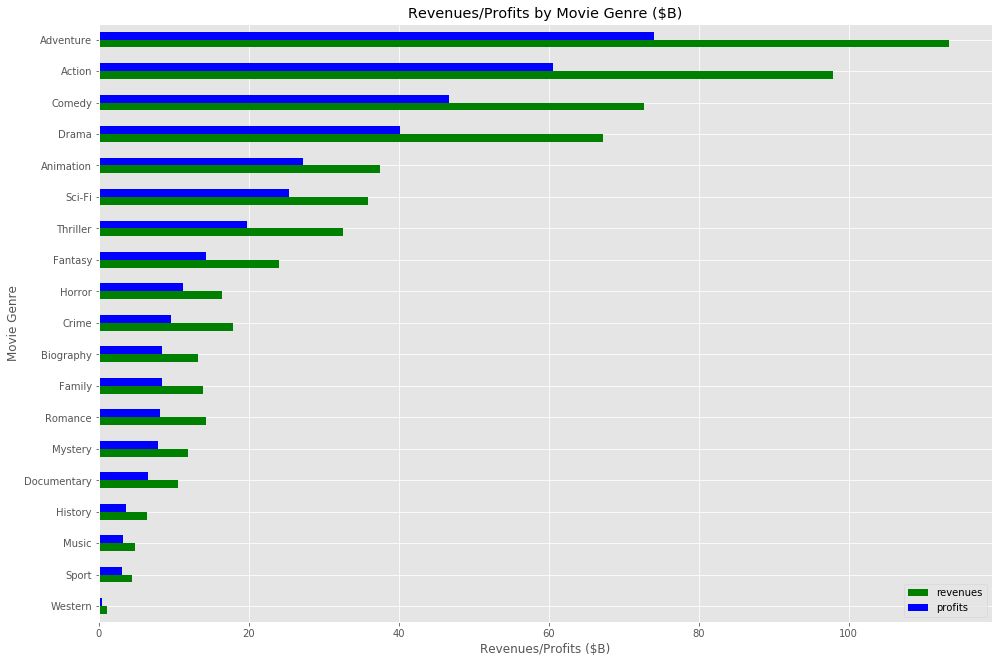

In [15]:
#Retrieve list of each genre
names = list(df1.genres.unique())
x = 0
while x < len(names):
    if ',' in names[x]: names.pop(x) #drop every multi genre entry
    else: x+=1

#found it easier to first convert to dict then df
#Add up quantities of movies for each genre
df2 = {names[x]: len(df1.loc[df1.genres.str.contains(names[x])]) for x in range(len(names))}
df2 = pd.DataFrame.from_dict(df2, orient='index', columns=['# of movies'])

#Add up total revenues and profits for each genre
df2['revenues'] = 0.0
df2['profits'] = 0.0
for x in names:
    df2.revenues[x] = sum(df1.loc[df1.genres.str.contains(x)].total_gross)
    df2.profits[x] = sum(df1.loc[df1.genres.str.contains(x)].profit)
df2.revenues = df2.revenues/1000000000
df2.profits = df2.profits/1000000000
df2.sort_values(by='profits', inplace=True)

#Plot
df2.drop(labels='# of movies', axis=1).plot(kind='barh', color = ['green','blue'], figsize=(16,11),
                                            title='Revenues/Profits by Movie Genre ($B)')
plt.xlabel('Revenues/Profits ($B)')
plt.ylabel('Movie Genre')
plt.show()

### It should be no surprise that Adventure, Action, Comedy and Drama are the top grossing and most produced film categories

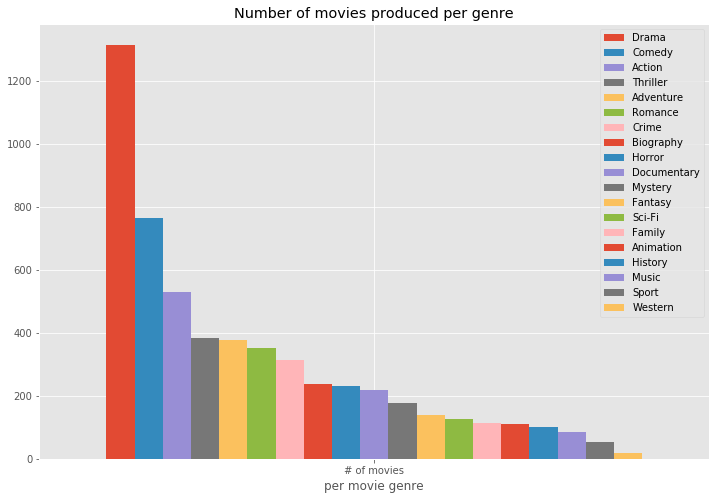

In [16]:
#Plot # of movies made by genre
df2.sort_values(by='# of movies', ascending=False, inplace=True)
df2.drop(labels=['revenues'], axis=1, inplace=True)
df2.drop(labels=['profits'], axis=1, inplace=True)

df2.transpose().plot(kind='bar', figsize=(12,8), grid='bool', width=2.0, rot='horizontal',
                     title='Number of movies produced per genre')
plt.xlabel('per movie genre')
plt.show()

### Now let's look at other movie attributes such as duration, ratings and reviews

In [17]:
#Start with the large original 'genres' table 
df1 = dfg.join(ratings.set_index('tconst'))

#Drop rows with null values, unnecessary columns
df1.dropna(inplace=True)
df1.drop(labels=['primary_title'], axis=1, inplace=True)
df1.drop(labels=['start_year'], axis=1, inplace=True)
df1.set_index('original_title', inplace=True)
df1.head(3)

,runtime_minutes,genres,averagerating,numvotes
original_title,,,,
Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43.0
The Other Side of the Wind,122.0,Drama,6.9,4517.0


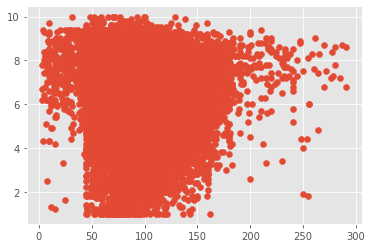

In [18]:
#Plot movie length vs ratings after dropping outliers
plt.scatter(x=df1[df1.runtime_minutes<300].runtime_minutes, y=df1[df1.runtime_minutes<300].averagerating)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263294FCCC0>,
      dtype=object)

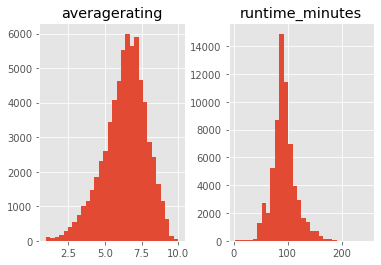

In [19]:
#Let's see how ratings and runtime minutes are distributed
df1[df1.runtime_minutes<250].drop(['numvotes'],axis=1).hist(bins=30)

#### Ratings and movie durations appear to be normal distributions but not correlated - let's see if these plots differ for the top 75% percentile

In [20]:
df1.sort_values(by='averagerating', ascending=False).describe().round()

,runtime_minutes,averagerating,numvotes
count,65718.0,65718.0,65718.0
mean,95.0,6.0,3955.0
std,209.0,1.0,32089.0
min,3.0,1.0,5.0
25%,81.0,6.0,16.0
50%,91.0,6.0,62.0
75%,104.0,7.0,352.0
max,51420.0,10.0,1841066.0


In [21]:
df1.sort_values(by='averagerating', ascending=False, inplace=True)
df1 = df1[df1.averagerating>7.0]
df1 = df1[df1.runtime_minutes<300]

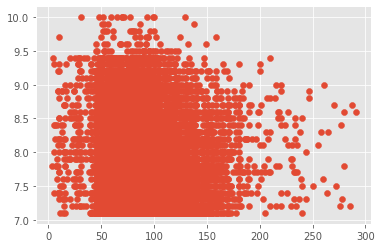

In [22]:
plt.scatter(x=df1.runtime_minutes, y=df1.averagerating)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026321217F98>,
      dtype=object)

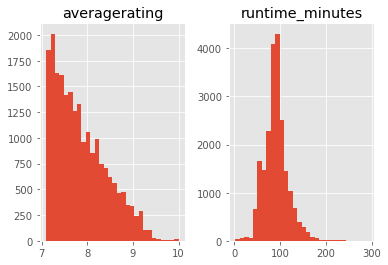

In [23]:
df1.drop(['numvotes'],axis=1).hist(bins=30)

In [24]:
#Let's slice this dataset a little higher to provide recommendations
df1 = df1[df1.averagerating>8.0]
#Find average length and ratings for these 'top rated' movies
display(df1.runtime_minutes.median(), df1.runtime_minutes.mean(), df1.averagerating.median(), df1.averagerating.mean())

86.0

87.28691250903832

8.5

8.553318872017353

In [25]:
#Get a count of genres for these top rated movies
df2 = {names[x]: len(df1.loc[df1.genres.str.contains(names[x])]) for x in range(len(names))}
df2 = pd.DataFrame.from_dict(df2, orient='index', columns=['# of movies'])
df2.sort_values(by='# of movies', ascending=False, inplace=True)
df2

,# of movies
Documentary,3946
Drama,2385
Comedy,984
Biography,722
Music,505
History,495
Family,362
Action,313
Adventure,312
Romance,285


### Interesting. So it seems the most popular genres for the highest rated movies (>8.0) are quite different. Considering that this is a different metric for success, one has to consider the bias this likely reflects. Many of these (documentary, biography, music, history) are nonfiction categories, likely attracting a more niche audience. This audience is usually less diverse than the 'mainstream' population (favoring fiction genres - Action, Adventure) but they also appear to be more positive in their average ratings. As a final note, the Drama category ranked #1 and #2 in both comparisons, when measured by the highest revenues/profits vs ratings.